In [1]:
import glob
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from os import listdir

In [2]:
# My local paths TODO Can git lfs resolve this?
### Laptop path ###
#filepath = '../csv/long_traces_June07_2022/12mus_25MHzSr_1kpts_10mVperdiv_ch4_44.135Bias/'
#filename = 'trace_ch4_20220607144157804.csv'
### CSU Machine path ###
filepath_above_breakdown = '../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/'
filenames_above_breakdown = glob.glob(filepath_above_breakdown+'*.csv')

candidate_count_abd = 0
window_size = 1e-6    # Desired window size of 1 mus
candidate_threshold = 2 # nV*s
#sample_interval = 4e-8 # From csv header
#steps_in_window = window_size / sample_interval
# Loop files 
for file_abd in filenames_above_breakdown:
    print('Looping file', file_abd)
    trace = np.loadtxt(file_abd,delimiter=',', skiprows=10)
    time    = trace[:,0]
    voltage = trace[:,1]*1e-9 # Convert to nV for integral (want nV*s)
    # TODO Automatically get this number from csv header
    #sample_interval = (time[100] - time[0])/100 # Use average to be a little more accurate
    sample_interval = 4e-8
    print('Sample interval', sample_interval)
    steps_in_window = math.ceil(window_size / sample_interval)
    print('Steps in window', steps_in_window)
    for i in range(0, len(time) - steps_in_window):
        # Factor of 1e-9 to convert seconds to nanoseconds
        window_integral = np.trapz(voltage[i:(i+steps_in_window)], x=time[i:(i+steps_in_window)])
        #print('Integral', window_integral)
        if window_integral > candidate_threshold:
            #print('Hey look a thing')
            candidate_count_abd += 1
            
print('Found', candidate_count_abd, 'candidates above breakdown')
    

#traces = np.loadtxt(filepath+filename,delimiter=',', skiprows=10)
# Factors of 10 convert s to mus and V to mV
#trace_time = traces[:,0]*1e5
#voltage    = traces[:,1]*1e3

Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144435713.csv
Sample interval 4.000000000000531e-08
Steps in window 25


/home/lartpc/anaconda3/envs/dune_fd_pds/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144903556.csv
Sample interval 4.000000000000531e-08
Steps in window 25
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144833710.csv
Sample interval 3.999999999999663e-08
Steps in window 26
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144505854.csv
Sample interval 3.999999999999663e-08
Steps in window 26
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144804531.csv
Sample interval 4.000000000000531e-08
Steps in window 25
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144635401.csv
Sample interval 4.0000099999996234e-08
Steps in window 25
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144705027.csv
Sample interval 3.

Model	MSO44

Waveform Type	ANALOG

Horizontal Units	s

Sample Interval	4.00E-08


Record Length	1000

Zero Index	142.772125

Vertical Units	V

ANALOG_Thumbnail	
	

Left window edge: -0.5710885
Right window edge: 0.42891150000000006
Window length in microseconds: 1.0


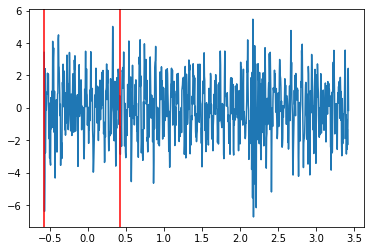

In [4]:
# Integrate in window of length 1 microsecond in steps of 40 ns
#print(trace_time)
integrals = []
for i in range(0, len(trace_time)-steps_in_window):
    # Factor of 1e3 converts microseconds to nanoseconds 
    # Factor of 1e-3 converts mV to V
    integrals.append(np.trapz(voltage[i:i+steps_in_window]*1e-3, x=trace_time[i:i+steps_in_window])*1e3)
    if integrals[i] > 2: # 2 ns*V indicates single photon peak
        print('Hey look a thing')

Left window edge: -5.710885e-06
Right window edge: -4.710885e-06
Window length in microseconds: 9.999999999999997e-07


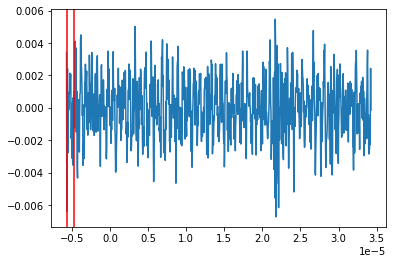

In [17]:
# Plot integration window for sanity check
# TODO Calculate steps_in_window rather than hard code
#steps_in_window = 250
print('Left window edge:', time[0])
print('Right window edge:', time[steps_in_window])
print('Window length in microseconds:', time[steps_in_window] - time[0])
plt.plot(time, voltage)
plt.axvline(time[0], color='r')
plt.axvline(time[steps_in_window], color='r')